In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Estadísticas Descriptivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   2

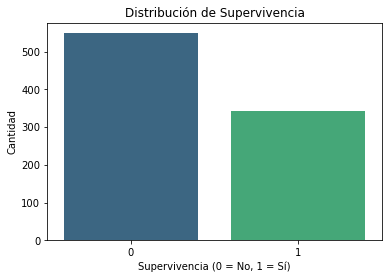

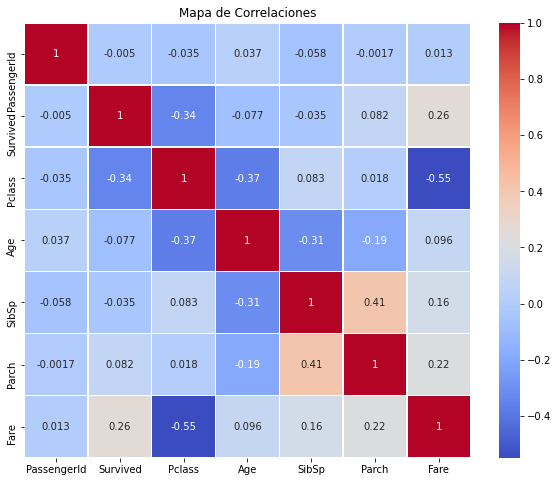

In [2]:
# Cargar y explorar los datos

# Cargar el dataset
file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

# Mostrar información básica del dataset
print("Información del Dataset:")
print(data.info())

# Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
print(data.describe())

# Visualización de la distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title('Distribución de Supervivencia')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

# Visualización de correlaciones entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Correlaciones")
plt.show()

In [3]:
# Preprocesamiento de Datos

# Tratar valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convertir variables categóricas a dummies
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Eliminar columnas irrelevantes
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

print("\nDatos preprocesados:")
print(data.head())


Datos preprocesados:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500         1           0   
1         1       1  38.0      1      0  71.2833         0           0   
2         1       3  26.0      0      0   7.9250         0           0   
3         1       1  35.0      1      0  53.1000         0           0   
4         0       3  35.0      0      0   8.0500         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


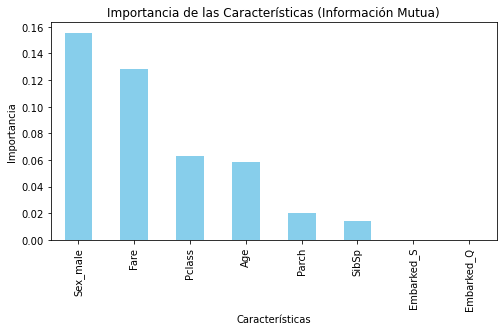


Características seleccionadas: ['Sex_male', 'Fare', 'Pclass', 'Age', 'Parch', 'SibSp']
La importancia de las características muestra que factores como la clase del pasajero, el género y la edad tienen un gran impacto en la predicción de la supervivencia.


In [5]:
# Selección de Características

X = data.drop('Survived', axis=1)  # Variables independientes
y = data['Survived']  # Variable objetivo

# Evaluar importancia de características utilizando Información Mutua
mutual_info = mutual_info_classif(X, y, random_state=42)
mutual_info = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Visualizar importancia de características
plt.figure(figsize=(8, 4))
mutual_info.plot(kind='bar', color='skyblue')
plt.title('Importancia de las Características (Información Mutua)')
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.show()

# Seleccionar características más relevantes
selected_features = mutual_info[mutual_info > 0].index.tolist()
X = X[selected_features]
print("\nCaracterísticas seleccionadas:", selected_features)

print("La importancia de las características muestra que factores como la clase del pasajero, el género y la edad tienen un gran impacto en la predicción de la supervivencia.")

In [6]:
# Dividir el Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 712 muestras
Conjunto de prueba: 179 muestras


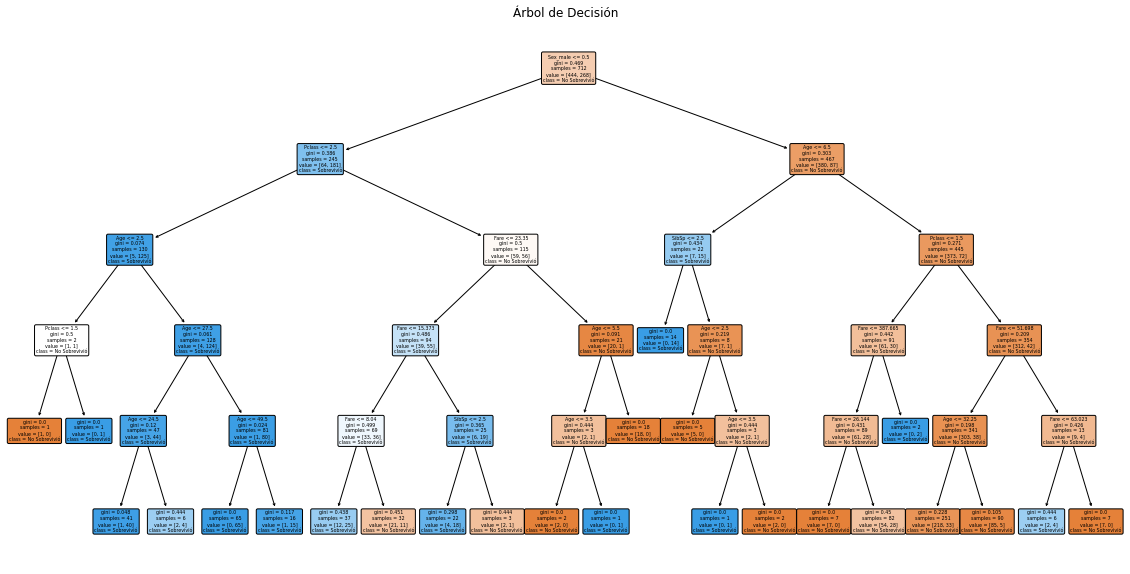

In [7]:
# Entrenar el Modelo

# Crear y entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Sobrevivió', 'Sobrevivió'], filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()

In [8]:
# Evaluar el Desempeño del Modelo

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas de evaluación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Calcular la precisión total
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del Modelo: {accuracy:.2f}")


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179


Matriz de Confusión:
[[95 10]
 [25 49]]

Precisión del Modelo: 0.80


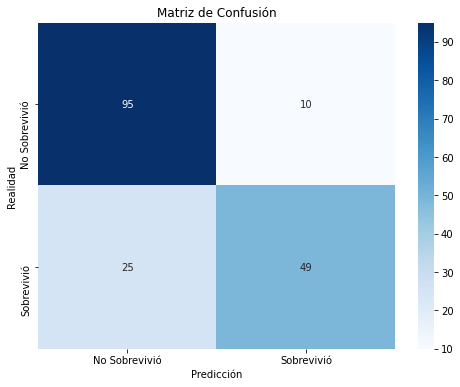

In [9]:
# Visualización de Resultados

# Matriz de confusión visualizada
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [10]:
# Interpretación de Resultados

print("\nInterpretación de Resultados:")
print(f"El modelo de Árbol de Decisión alcanzó una precisión del {accuracy*100:.2f}%.")
print("La importancia de las características muestra que factores como la clase del pasajero, el género y la edad tienen un gran impacto en la predicción de la supervivencia.")


Interpretación de Resultados:
El modelo de Árbol de Decisión alcanzó una precisión del 80.45%.
La importancia de las características muestra que factores como la clase del pasajero, el género y la edad tienen un gran impacto en la predicción de la supervivencia.
